### Task 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Построим график, чтобы определить, есть ли линейная зависимость между данными.

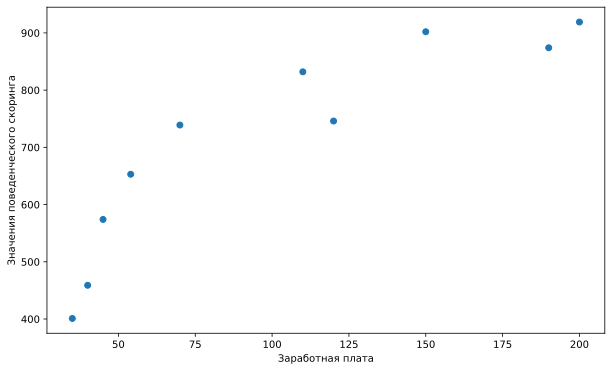

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(zp, ks)

plt.xlabel('Заработная плата')
plt.ylabel('Значения поведенческого скоринга')

plt.show()

Из графика видно, что между данными есть линейная зависимость. Следовательно, связь между ними можно описать линейной функцией: ks = a + b*zp.

Определим коэффициент b:

In [5]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b

2.620538882402765

Определим интерсепт a:

In [6]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Функция линейной зависимости имеет вид: ks = 444.177 + 2.621*zp. Построим график этой функции:

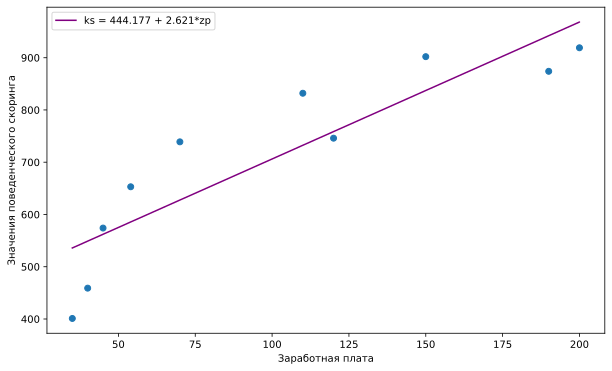

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(zp, ks)
plt.plot(zp, a + b*zp, color='purple', label='ks = 444.177 + 2.621*zp')

plt.xlabel('Заработная плата')
plt.ylabel('Значения поведенческого скоринга')

plt.legend()

plt.show()

Теперь определим коэффициенты a и b с помощью матричного метода:

In [8]:
x = zp.reshape((-1, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [9]:
x = np.hstack([np.ones((10, 1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [10]:
y = ks.reshape((-1, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [11]:
b_1 = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
b_1

array([[444.17735732],
       [  2.62053888]])

In [12]:
print(f'a = {b_1[0, 0]}, b = {b_1[1, 0]}')

a = 444.1773573243595, b = 2.6205388824027693


Как видно из результата, коэффициенты получились такие же, как и при расчёте с помощью математических формул.

Теперь произведём расчёт без интерсепта. Линейная зависимость будет описана в виде: ks = b*zp.

In [13]:
x_2 = zp.reshape((-1, 1))
x_2

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [14]:
y_2 = ks.reshape((-1, 1))
y_2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [15]:
b_2 = np.dot(np.linalg.inv(np.dot(x_2.T, x_2)), np.dot(x_2.T, y_2))
b_2

array([[5.88982042]])

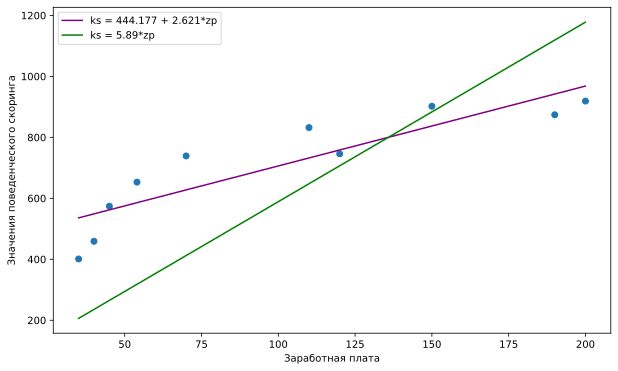

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(zp, ks)
plt.plot(zp, a + b*zp, color='purple', label='ks = 444.177 + 2.621*zp')
plt.plot(zp, b_2[0]*zp, color='green', label='ks = 5.89*zp')

plt.xlabel('Заработная плата')
plt.ylabel('Значения поведенческого скоринга')

plt.legend()

plt.show()

Как видно из графика, линейная модель без интерсепта работает хуже.

### Task 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [31]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [32]:
def mse_(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [33]:
mse_(b, x, y)

203763.93896082853

Определим производную функции потерь:

In [34]:
def mse_p(b, x, y):
    return (2/len(x)) * np.sum((b * x - y) * x)

Зададим скорость обучения:

In [35]:
alpha = 1e-06

Зададим начальный параметр:

In [36]:
b1 = 0.1

In [46]:
for i in range(10000):
    b1 -= alpha * mse_p(b1, x, y)
    if i % 5000 == 0:
        print(f'Iteration: {i}, b1 = {b1}, mse = {mse_(b1, x, y)}')

Iteration: 0, b1 = 5.889820420132705, mse = 56516.8584157194
Iteration: 5000, b1 = 5.889820420132705, mse = 56516.8584157194


Коэффициент линейно регрессии: 5.8898. 

### Task 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Определеим функцию потерь:

In [47]:
def mse_(b0, b1, x, y):
    return np.sum((b0 + b1*x - y) ** 2) / len(x)

Вычислим частную производную по b0:

In [52]:
def mse_pb0(b0, b1, x, y):
    return (2/len(x)) * np.sum(b0 + b1*x - y)

Вычислим частную производную по b1:

In [48]:
def mse_pb1(b0, b1, x, y):
    return (2/len(x)) * np.sum((b0 + b1*x - y) * x)

Определим начальные параметры:

In [49]:
b1 = 0.1

In [50]:
b0 = 0.1

Скорость обучения:

In [51]:
alpha = 1e-06

In [53]:
for i in range(3500000):
    b0 -= alpha * mse_pb0(b0, b1, x, y)
    b1 -= alpha * mse_pb1(b0, b1, x, y)
    if i % 300000 == 0:
        print(f'Iteration: {i}, b0 = {b0}, b1 = {b1}, mse = {mse_(b0, b1, x, y)}')

Iteration: 0, b0 = 0.169966, b1 = 8.074680544760001, mse = 122318.06397097581
Iteration: 300000, b0 = 443.95740007610897, b1 = 2.622157823932053, mse = 6470.426473787141
Iteration: 600000, b0 = 444.17724836347435, b1 = 2.6205396843827113, mse = 6470.41420117967
Iteration: 900000, b0 = 444.177357270376, b1 = 2.6205388828000986, mse = 6470.414201176658
Iteration: 1200000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 1500000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 1800000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 2100000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 2400000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 2700000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176657
Iteration: 3000000, b0 = 444.17735732323916, b1 = 2.620538882411012, mse = 6470.414201176

Ответ: b0 = 444.1773, b1 = 2.6205.